<a href="https://colab.research.google.com/github/Ashrita0111/TSLA/blob/main/Ford_Stock_Prediction_Final(Logistic_Regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Resources used:
Random Forest- https://github.com/dataquestio/project-walkthroughs/blob/master/stock/StockProject.ipynb

Logistic Regression-https://www.geeksforgeeks.org/stock-price-prediction-using-machine-learning-in-python/

## **Import FORD stock data using Yahoo Finance**

In [ ]:
pip install yfinance

In [ ]:
import yfinance as yf

In [ ]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
%matplotlib inline

In [ ]:
GetFORD = yf.Ticker("FORD")

In [ ]:
df = GetFORD.history(period= "max")

In [ ]:
print(df.columns)

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')


In [ ]:
df['Date'] = df.index
print(df.columns)

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits',
       'Date'],
      dtype='object')


In [ ]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Date
Date,,,,,,,,
1994-11-17 00:00:00-05:00,1.125,1.125,1.125,1.125,2100,0.0,0.0,1994-11-17 00:00:00-05:00
1994-11-18 00:00:00-05:00,1.125,1.125,1.125,1.125,0,0.0,0.0,1994-11-18 00:00:00-05:00
1994-11-21 00:00:00-05:00,1.125,1.125,1.125,1.125,0,0.0,0.0,1994-11-21 00:00:00-05:00
1994-11-22 00:00:00-05:00,1.125,1.125,1.125,1.125,0,0.0,0.0,1994-11-22 00:00:00-05:00
1994-11-23 00:00:00-05:00,2.000,2.000,2.000,2.000,1000,0.0,0.0,1994-11-23 00:00:00-05:00
...,...,...,...,...,...,...,...,...
2024-04-23 00:00:00-04:00,0.520,0.520,0.500,0.500,8600,0.0,0.0,2024-04-23 00:00:00-04:00
2024-04-24 00:00:00-04:00,0.500,0.540,0.490,0.510,18700,0.0,0.0,2024-04-24 00:00:00-04:00
2024-04-25 00:00:00-04:00,0.630,0.630,0.500,0.560,32100,0.0,0.0,2024-04-25 00:00:00-04:00


## **Observe FORD stock data**

In [ ]:
df.tail(2)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Date
Date,,,,,,,,
2024-04-26 00:00:00-04:00,0.53,0.560,0.50,0.540,41100,0.0,0.0,2024-04-26 00:00:00-04:00
2024-04-29 00:00:00-04:00,0.53,0.535,0.53,0.535,5900,0.0,0.0,2024-04-29 00:00:00-04:00


In [ ]:
df.shape

(7412, 8)

In [ ]:
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,7412.000000,7412.000000,7412.000000,7412.000000,7.412000e+03,7412.0,7412.000000
mean,2.820974,2.920599,2.711886,2.808504,1.353913e+05,0.0,0.000337
std,3.509753,3.630653,3.357222,3.484529,9.637665e+05,0.0,0.023945
min,0.480000,0.520000,0.460000,0.460000,0.000000e+00,0.0,0.000000
25%,1.230000,1.270000,1.190000,1.230000,1.140000e+04,0.0,0.000000
50%,1.750000,1.810000,1.690000,1.750000,2.710000e+04,0.0,0.000000
75%,2.783437,2.890000,2.687500,2.762500,6.810000e+04,0.0,0.000000
max,29.049999,29.850000,27.629999,28.719999,5.832440e+07,0.0,2.000000


In [ ]:
#checking for null values
df.isnull().sum()

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
Date            0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7412 entries, 1994-11-17 00:00:00-05:00 to 2024-04-29 00:00:00-04:00
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype                           
---  ------        --------------  -----                           
 0   Open          7412 non-null   float64                         
 1   High          7412 non-null   float64                         
 2   Low           7412 non-null   float64                         
 3   Close         7412 non-null   float64                         
 4   Volume        7412 non-null   int64                           
 5   Dividends     7412 non-null   float64                         
 6   Stock Splits  7412 non-null   float64                         
 7   Date          7412 non-null   datetime64[ns, America/New_York]
dtypes: datetime64[ns, America/New_York](1), float64(6), int64(1)
memory usage: 521.2 KB


In [ ]:
x = df.index
y = df['Close']
y

Date
1994-11-17 00:00:00-05:00    1.125
1994-11-18 00:00:00-05:00    1.125
1994-11-21 00:00:00-05:00    1.125
1994-11-22 00:00:00-05:00    1.125
1994-11-23 00:00:00-05:00    2.000
                             ...  
2024-04-23 00:00:00-04:00    0.500
2024-04-24 00:00:00-04:00    0.510
2024-04-25 00:00:00-04:00    0.560
2024-04-26 00:00:00-04:00    0.540
2024-04-29 00:00:00-04:00    0.535
Name: Close, Length: 7412, dtype: float64

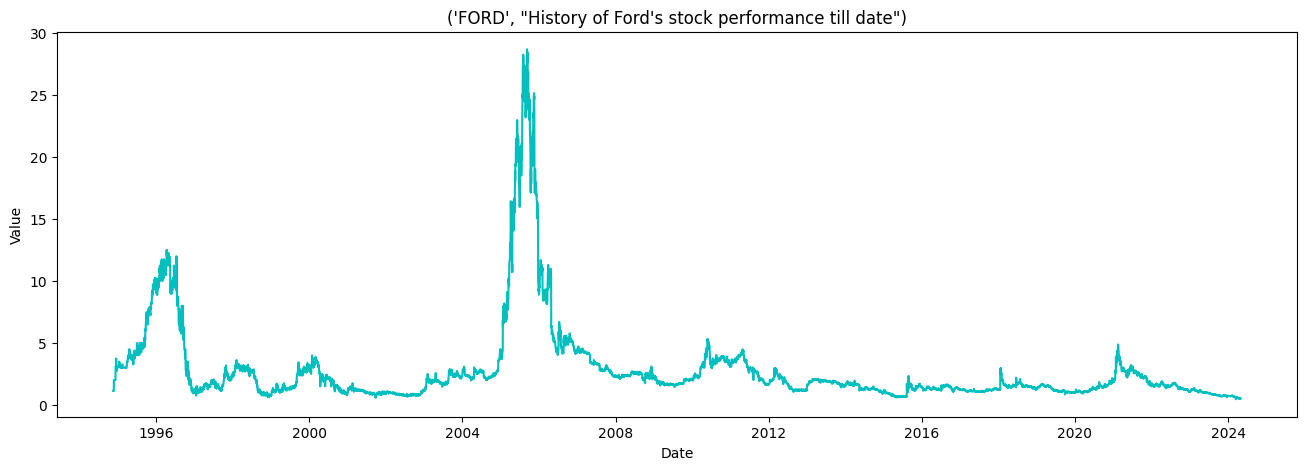

In [ ]:
def df_plot(data, x, y, title="", xlabel='Date', ylabel='Value'):
    plt.figure(figsize=(16,5))
    plt.plot(x, y, color='c')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

stock_name= "FORD"
title = (stock_name,"History of Ford's stock performance till date")
df_plot(df , x , y , title=title,xlabel='Date', ylabel='Value')

## **Logistic Regression**

In [ ]:
#added some columns that will help to train our model
#target is a signal if to buy a stock or not
df['open-close']  = df['Open'] - df['Close']
df['low-high']  = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

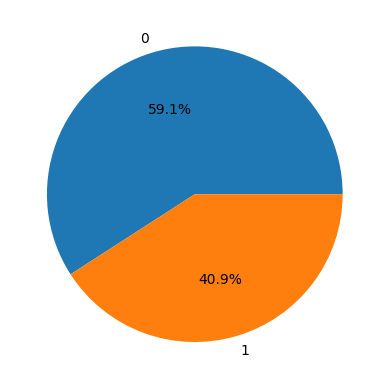

In [ ]:
#checking to see how balances our target is
plt.pie(df['target'].value_counts().values,
        labels=[0, 1], autopct='%1.1f%%')
plt.show()

In [ ]:
!pip install scikit-learn

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
#splitting the data by selecting the features to train and normalize the data
features = df[['open-close', 'low-high']]
target = df['target']

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_valid, Y_train, Y_valid = train_test_split(
    features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)

(6671, 2) (742, 2)


In [ ]:
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics

In [ ]:
models = [LogisticRegression()]

for i in range(1):
  models[i].fit(X_train, Y_train)

  print(f'{models[i]} : ')
  print('Training Accuracy : ', metrics.roc_auc_score(
    Y_train, models[i].predict_proba(X_train)[:,1]))
  print('Validation Accuracy : ', metrics.roc_auc_score(
    Y_valid, models[i].predict_proba(X_valid)[:,1]))
  print()

LogisticRegression() : 
Training Accuracy :  0.5733935312126144
Validation Accuracy :  0.5762598111705153



## **Prediction Process**



The target will be if the price will go up or down tomorrow. The value is 1, if the price went up and 0, if the price went down.

In [ ]:
df = df.reset_index(drop=True)

In [ ]:
df.head(2)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Date,open-close,low-high,target
0,1.125,1.125,1.125,1.125,2100,0.0,0.0,1994-11-17 00:00:00-05:00,0.0,0.0,0
1,1.125,1.125,1.125,1.125,0,0.0,0.0,1994-11-18 00:00:00-05:00,0.0,0.0,0


In [ ]:
df = df.drop(columns=['Date'])


In [ ]:
df.head(2)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,open-close,low-high,target
0,1.125,1.125,1.125,1.125,2100,0.0,0.0,0.0,0.0,0
1,1.125,1.125,1.125,1.125,0,0.0,0.0,0.0,0.0,0


In [ ]:
#Labeling the column that'll be the actual closing price
data = df[["Close"]]
data = data.rename(columns = {'Close':'Actual_Close'})

#set up our target to identify if the price actually increased or decreased
data["Target"] = df.rolling(2).apply(lambda x: x.iloc[1] > x.iloc[0])["Close"]

In [ ]:
#shifted the prices forward by a day since we're trying to predict the next day's stock price
msft_prev = df.copy()
msft_prev = msft_prev.shift(1)

In [ ]:
#create the training data
predictors = ["Close", "Volume", "Open", "High", "Low"]
data = data.join(msft_prev[predictors]).iloc[1:]

In [ ]:
#visualize what's stored in data
data.head(2)

,Actual_Close,Target,Close,Volume,Open,High,Low
1,1.125,0.0,1.125,2100.0,1.125,1.125,1.125
2,1.125,0.0,1.125,0.0,1.125,1.125,1.125


In [ ]:
#reset index and conver it to column
df.reset_index(inplace=True)

In [ ]:
df.head(1)

,index,Open,High,Low,Close,Volume,Dividends,Stock Splits,open-close,low-high,target
0,0,1.125,1.125,1.125,1.125,2100,0.0,0.0,0.0,0.0,0


In [ ]:
#dropping unnecessary columns from the set
df.drop(columns=['Dividends','Stock Splits']).head(2)

,index,Open,High,Low,Close,Volume,open-close,low-high,target
0,0,1.125,1.125,1.125,1.125,2100,0.0,0.0,0
1,1,1.125,1.125,1.125,1.125,0,0.0,0.0,0


In [ ]:
column_names = list(df.columns.values)
print(column_names)

['index', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits', 'open-close', 'low-high', 'target']


In [ ]:
df['Date'] = df.index
print(df.columns)

Index(['index', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits', 'open-close', 'low-high', 'target', 'Date'],
      dtype='object')


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
x = df[['Open', 'High','Low', 'Volume']]
y = df['Close']

In [ ]:
#split the data into test and training with the testsize being 15% of total dataset
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.15 , shuffle=False,random_state = 0)

In [ ]:
print(train_x.shape )
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)
(551, 4)
(98, 4)
(551,)
(98,)

(6300, 4)
(1112, 4)
(6300,)
(1112,)


(98,)